#**Fourier analysis of audio signals to separate tracks of different instruments**

>Work done by **Christian Stingone** https://github.com/ChriStingo

**Objective**:
> Analyze an audio signal consisting of two or more instruments. Work on the Fourier transform to obtain the original audio tracks of the instruments that make up the signal given in input.


**Introduction**:
> This can be achieved by manually making selections by observing the Fourier transform and making various attempts.
>
> Personally I don't think this method is interesting, so I looked for a way to perform this procedure automatically.
>
>Therefore, given a signal with certain characteristics, such as that of being composed of instruments whose transforms have distinct frequencies, I tried to obtain, through appropriate cuts, a filter on the frequencies that would divide those belonging to one instrument from those belonging to another. Obviously all this without knowing the instruments that make up the signal given in input.
>
>This method does not guarantee absolute precision and does not always manage to divide the instruments perfectly, this is due to how the Fourier transform of the composite signal looks.
>
>Nevertheless, I have prepared two optimal examples where this occurs with acceptable accuracy.

Explanations of the algorithm are available in the implementation section.

# **Theoretical introduction**

#### **Audio signals:**

An audio signal is an analog representation of a sound. What we perceive as sound corresponds to the physical phenomenon of the variation of the air pressure inside our ear. The air pressure varies over time, but given a moment we can represent the sound with a certain value. We must therefore have an analogical representation of the sound to be able to analyze it with mathematical tools.

An analog representation of a sound is an analog 1D signal, which varies with time. Audio signals are precisely functions that are continuous over time.

To convert an analog signal into digital we need an ADC (analog to digital converter) which translates the sound into its digital representation, which can then be manipulated and processed.

To convert an audio signal, however, we must first record it, and to do this we use a transducer. This tool, often a microphone, transforms the sound signal into an electrical signal, which is then passed to an ADC card which converts it into digital. If we want to carry out the reverse operation, we will need a transducer that converts the signal from digital to analog.

To convert an ADC needs to know which sampling rate to use, this term is used to indicate how many signal samples we need to quantize per second, that is the sampling frequency. According to the Nyquist theorem, the sampling number must be at least double the maximum frequency of the signal, otherwise there will be distortions. Obviously, the greater the number of samplings, the higher the quality and reliability of the signal.

We can see in this example an increase in the sampling frequency and therefore an increase in the black points on the signal, which correspond to the values ​​that will make up its digital representation.
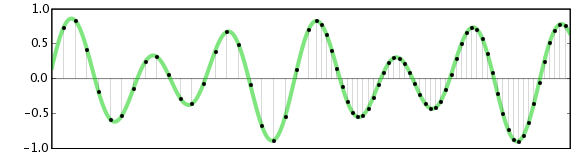




#### **Fourier transform**


In this project I will work practically only on the Fourier transform of audio signals, so I will now give an explanation of what it is and how it works.

The Fourier transform is an integral transform that operates by transforming one function into another function. It is used to transform a signal that exists on a time domain into a frequency domain signal. So it is possible to see which frequencies a signal is composed of.

From a mathematical point of view:

>Fourier series formula:
>
>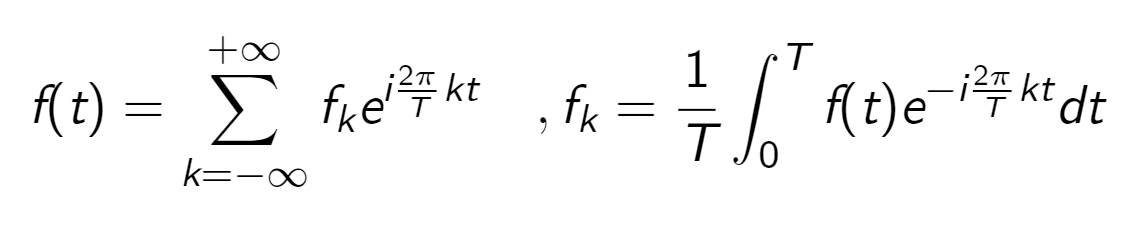
>
>Where (0, T) corresponds to the chosen integration interval.

>Discretization of the Fourier series:
>
>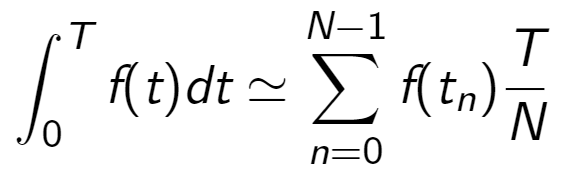
>
>Instead of calculating the integral it is possible to discretize it through this series where N is the number of equal intervals in which to divide the previously chosen interval.


#### **Inverse of the Fourier transform**

If we want to pass from the frequency domain to the time domain we have to apply the inverse of the Fourier transform.

From a mathematical point of view:
> Formula of the inverse:
>
>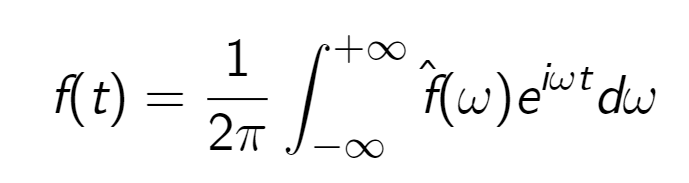

>Discrete reverse:
>
> 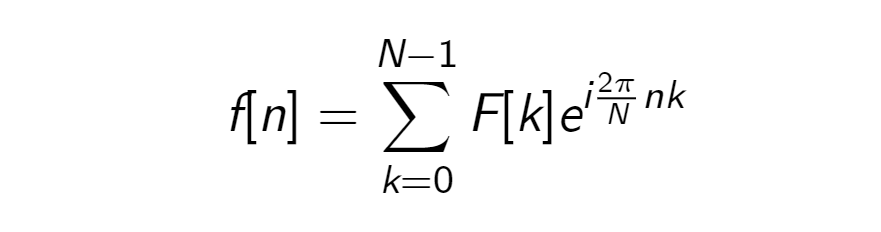


Remember that the inverse of the Fourier transform is not an approximation of the original signal, but is actually the original signal.

#### **Frequency domain**

As mentioned earlier in this project I will always work in the frequency domain, that is, on the signals after the Fourier transform has been applied.

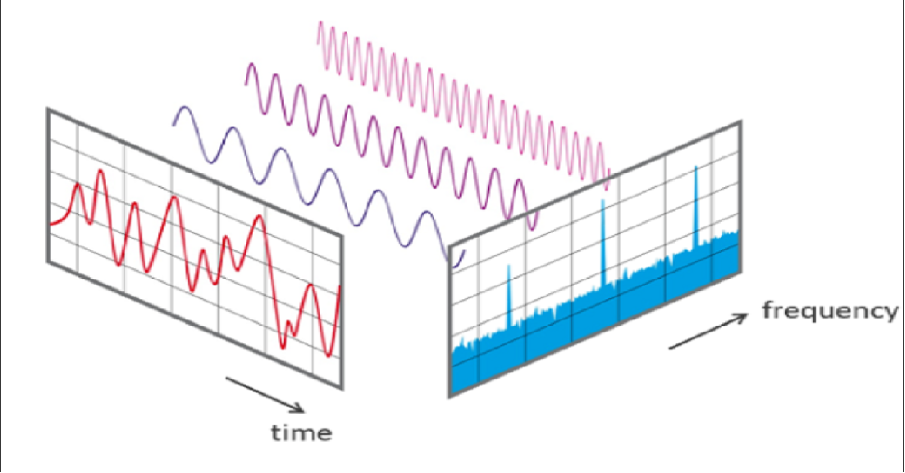

This choice is due to the fact that, given two different instruments, it is possible to isolate the frequencies that make up the audio they reproduce.

Assuming this, it is possible to understand where the frequencies related to an audio signal end and where others begin. This is feasible as long as the Fourier of the two signals are distinct and have no frequencies in common, otherwise this technology cannot find distinctions between the two signals.

Furthermore, the values ​​obtained with the Fourier transform are complex numbers, to analyze and graph them it may be convenient to work only on real or imaginary values. In my case I always work on positive real values ​​(in absolute value)

Unfortunately even the Fourier transform has a limit, that is, it gives us the frequencies from which a signal is composed, but we do not know at what moment each frequency is reproduced. This, in my case study, is not relevant as I am not interested in analyzing the sound, but only its transformation by filtering the frequencies from which it is composed.

#### **Example of Fourier transform on an audio signal**

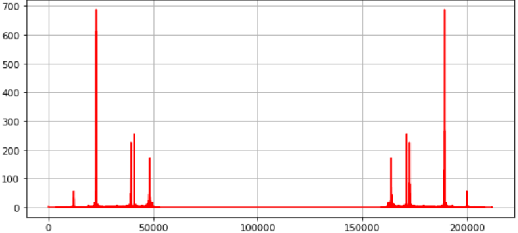

#### **Frequency Domain Filters**

To analyze a Fourier transformed signal we can use filters.

Low Pass Filter:
> This filter takes a threshold value as input and allows only the frequencies below it to pass. That is, if we imagine the graph of a Fourier transform like the one just shown, we must take a value on the x axis and draw a vertical line at this coordinate. All the values ​​to the left of the line, that is the values ​​with lower frequency, are taken, those to the right are not.

High Pass Filter:
> This filter works the same way as the low pass filter, but is its complementary. Given the same threshold, it only allows the passage of values ​​with a higher frequency.

Band pass filter:
> This filter takes two values ​​and selects all frequencies between these two values.

Within this project I select portions of frequencies and attribute them to an instrument, this operation corresponds to applying one of the following filters based on the position on the x axis in which I operate.

# **Implementation**

It is recommended that you run one cell at a time to note the progress of the run

In [39]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as ss
import IPython
import warnings
warnings.filterwarnings("ignore")       # To remove the warnings related to the cast from complex number to real number
%matplotlib inline

### **Audio Import**

Through this code cell I imported the audio of the instruments which, once joined, will form the sound to be analyzed.

Moreover, after having acquired the necessary data, I calculate the Fourier and allow the visualization through graphs.

I have provided two example cases to be able to run the program, the cases chosen are optimal as they do not have frequencies that overlap and therefore allow a better division of the composite signal into instruments. To run the second example case, just remove the comment on line 7 and line 10, so that the program assigns the correct paths to path_1 and path_3.

Audio_1


Audio_2


Composed audio


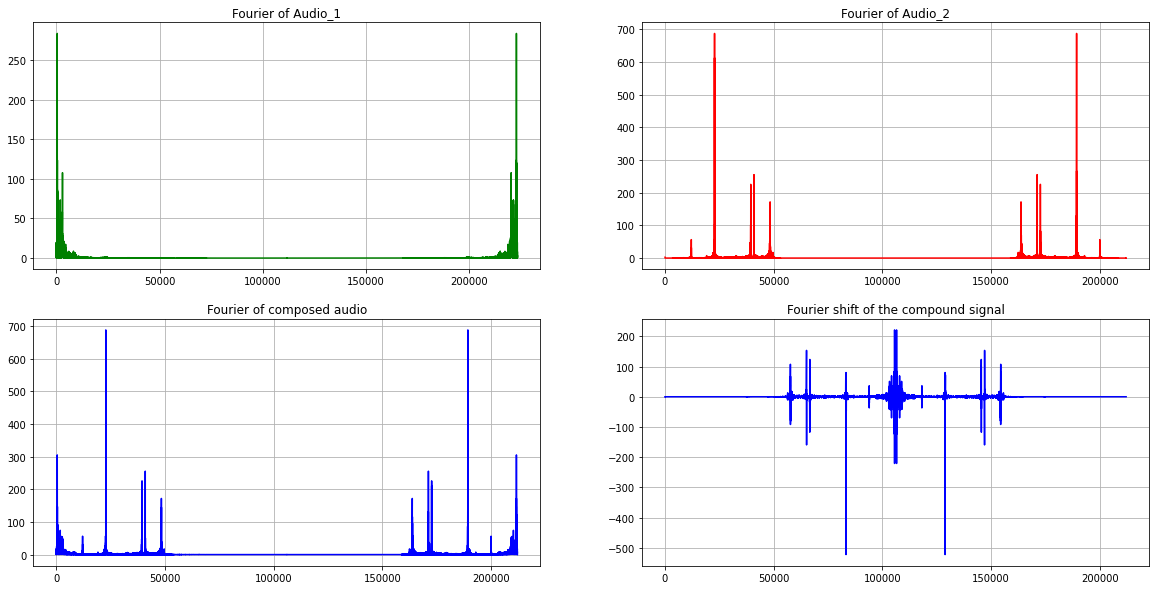

In [40]:
# Import file path
path_1 = "contrabass.wav"
path_2 = "triangle.wav"
path_3 = "combined_1.wav"     # contrabass.wav + triangle.wav

# Alternative to path_1 and its combined path_3, second example case. Uncomment to try another audio.
'''
path_1 = "bass.wav"
path_3 = "combined_2.wav"    # bass.wav + triangle.wav
'''

# Upload
frequency_1, sound_1 = wav.read(path_1)
frequency_2, sound_2 = wav.read(path_2)
frequency_3, sound_3 = wav.read(path_3)

# Compute temporal axes, used by charts
time_1 = 1/frequency_1 * np.arange(len(sound_1))
time_2 = 1/frequency_2 * np.arange(len(sound_2))
time_3 = 1/frequency_3 * np.arange(len(sound_3))

# Compute the Fourier
fourier_1 = np.fft.fft(sound_1)/len(sound_1)
fourier_2 = np.fft.fft(sound_2)/len(sound_2)
fourier   = np.fft.fft(sound_3)/len(sound_3)

# Audio
print("Audio_1")
IPython.display.display(IPython.display.Audio(path_1))
print("Audio_2")
IPython.display.display(IPython.display.Audio(path_2))
print("Composed audio")
IPython.display.display(IPython.display.Audio(path_3))

# Fourier charts
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0][0].plot(np.abs(fourier_1), '-g')  # Fourier in absolute value
ax[0][1].plot(np.abs(fourier_2), '-r')
ax[1][0].plot(np.abs(fourier), '-b')
ax[1][1].plot(np.fft.fftshift(fourier), '-b') # Fourier shifted
ax[0][0].set_title("Fourier of Audio_1")
ax[0][1].set_title("Fourier of Audio_2")
ax[1][0].set_title("Fourier of composed audio")
ax[1][1].set_title("Fourier shift of the compound signal")
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()
plt.show()

Visualization of the composed audio track and spectrogram

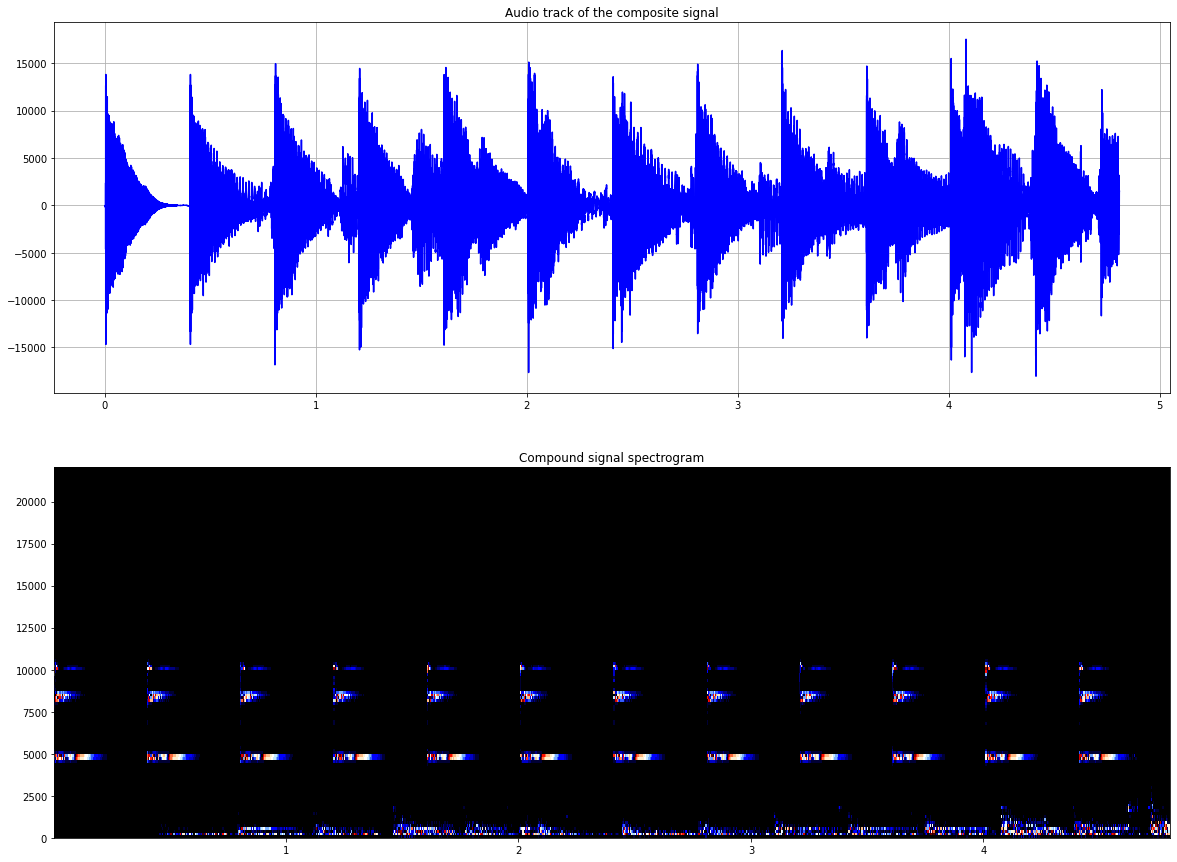

In [41]:
# Display of the audio track of the composite signal
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].set_title("Audio track of the composite signal")
ax[0].plot(time_3, sound_3, '-b')
ax[0].grid()
freq, t, spectrogram = ss.spectrogram(sound_3, frequency_3)
ax[1].set_title("Compound signal spectrogram")
ax[1].pcolormesh(t, freq, spectrogram, cmap='flag_r')
plt.show()

## **How to divide the composite signal into instruments**

Given a Fourier transform, the simplest way to divide it into instruments is to recognize which frequencies belong to one instrument and which to the other. To do this you can use the "glance", which in most cases helps a lot. In my case, however, I wanted to implement an algorithm that did this automatically.

Whenever I talk about functions or graphs, I will refer to the Fourier transform as an absolute value of the compound signal.

This algorithm is based on the concept of threshold. By threshold I mean a straight line with equation y = k with k constant number. This line is called threshold because, once inserted into the graph, it allows me to divide the values ​​into two sets: those whose function is greater than or equal to the threshold and those in which it is less.

Thanks to this distinction I can draw vertical lines where the function crosses the threshold. I define these vertical lines as "cuts". Therefore, taking two cuts I can identify the value contained between the two as totally higher or equal to the threshold or totally lower. If this value is lower I don't care, otherwise I classify it as belonging to an instrument.

Let's see an example:

(each example in this section is limited to giving a simple explanation, it does not attempt to represent a Fourier transform)


>Unfortunately the photos were produced in Italian
>
>* Taglio = cut
>* Soglia = threshold

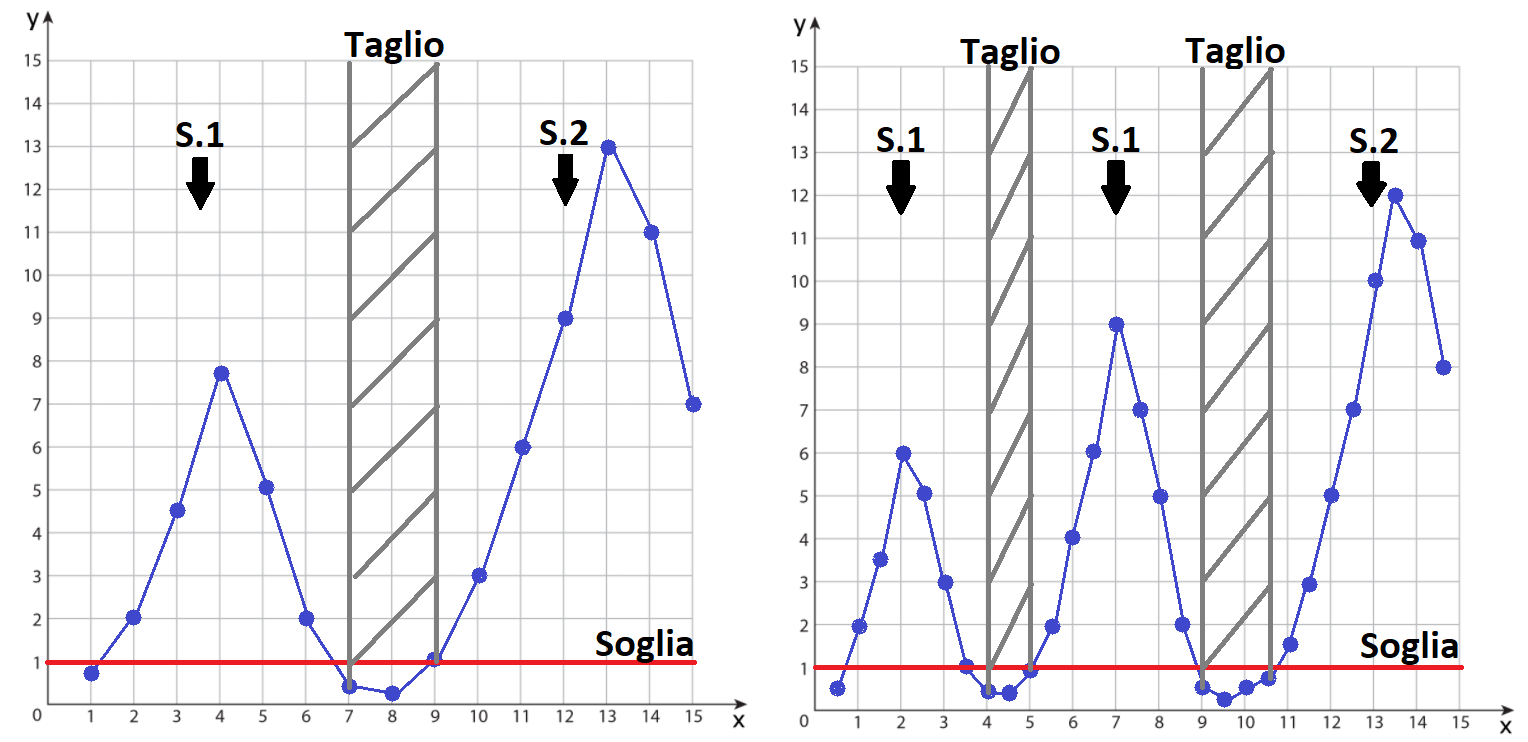
(S.1 = first instrument, S.2 = second instrument)

As you can see from the image on the left, this reasoning seems to work, but the example on the right refutes this theory. In this way I make too many cuts and too many divisions, without a sound classifier I am not able to understand which frequency belongs to an instrument.

To overcome this problem, I introduced the concept of constant, i.e. an equal value for the entire execution of the algorithm that is subtracted from the function I am analyzing, to translate it on the Y axis. Once translated, I could obtain negative values ​​and therefore **I reapply the absolute value**. By doing so I get a new function on which to apply the threshold.

This is true, but it doesn't work like it used to. Let's see how:

>Unfortunately the photos were produced in Italian
>
>* Taglio = cut
>* Soglia = threshold
>* Costante = constant

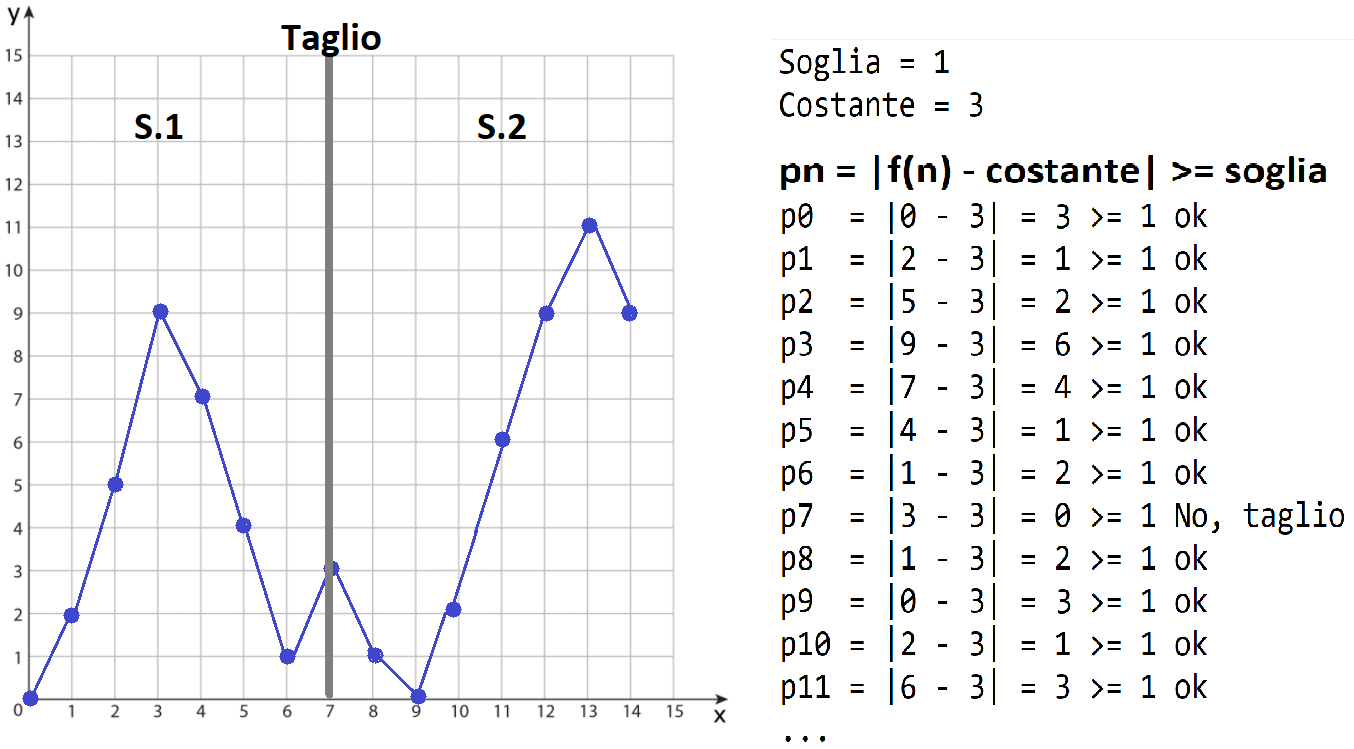

So what do I want to achieve with this reasoning?

I want to be able to define a threshold as an interval where every element inside it will be considered a possible cut point. By doing so I don't cut every time my function passes through the threshold range, but I divide every time an element belongs to the range and after it I recognize an element outside the range. This, on a probabilistic level, is much more unlikely and therefore decreases the number of cuts that will be made. Furthermore, if we appropriately choose the threshold value we can put it in correspondence with the value of the noise given by the reproduction of one instrument and the noise given by the reproduction of the next one. In this way we have that the function oscillates many times around the threshold, increasing the probability that an f(x) falls within the interval and that, therefore, is correctly considered a cut point.

This brings us to the following result:

>Unfortunately the photos were produced in Italian
>
>* Taglio = cut
>* Intervallo di soglia = threshold range
>* Rumore e accavallamenti = noise and overlaps

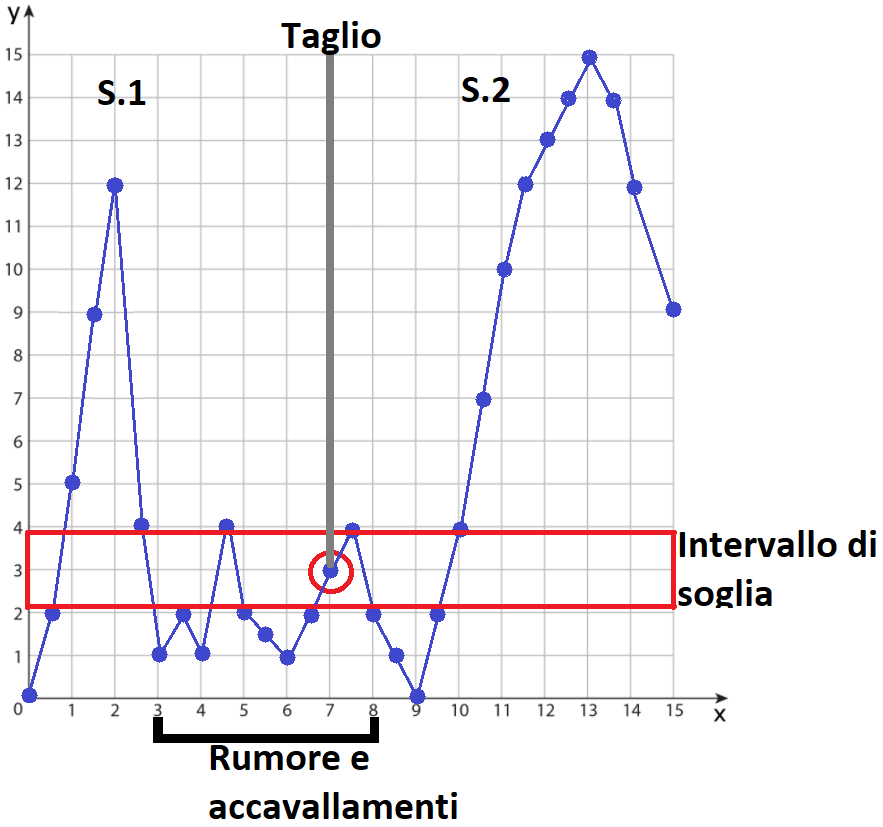

After appropriate tests I can confirm that this reasoning leads, most of the time, to acceptable results, obviously with a compound signal with certain characteristics (as reported above) and with suitable constant and threshold parameters.

## **Filtering and selecting potentially correct tools**

In this section we want to filter the composite audio taken as input and reconstruct the signals of the two instruments that compose it.

To do this we will use the concept of high pass, low pass and band pass filter by putting them together.

Given the signal and an appropriate threshold I will try to find the "body" of one of the two instruments from which the composite signal is made up, this will be facilitated by the preview function, which helps in finding the suitable threshold value.

Once this threshold (called epsilon) has been found, the filter_sound function will divide the original signal into the number of signals/instruments previously communicated.

This will happen by finding the value of `abs(abs(Fourier[x]) - a constant chosen by us) < threshold`, this value we suppose no longer belongs to the signal on which we are iterating and therefore we take all the values ​​of x with the relative y analyzed so far and we save them in a list. This will be the first extrapolated signal.

Then we repeat this operation as long as necessary and we will have divided our signal into sub-signals that correspond to its fragmentation.

The operation carried out is not new, it corresponds to the application of high pass, low pass and band pass filters depending on the point we are analyzing and on which we have to make a cut.

So in this way we will have divided by "instruments", but in reality we are only dividing by frequencies, isolating the set of frequencies that are supposed to be part of the same instrument.

Unfortunately, through Fuorier and the filters it is not possible to distinguish the type of instrument we are analyzing, let alone be sure that the cut made corresponds to a correct cut. This is due to the overlapping of the frequencies reproduced by the instruments. To get a better result it is advisable to use instruments that play very different frequencies, in fact I used a bass/contrabass and a triangle. In this way the reproduced frequencies are different enough not to have significant overlaps and therefore it is possible to obtain a satisfactory result even with Fourier and the relative frequency filters.

**Functions necessary for the cut to be made on the signal.**

**`filter_sound`**
> filter_sound divides the composite signal by saving the different sub-signals within splits and the cuts within cuts.
>
> This function takes as input the previously calculated epsilon and the constant used in the Fourier(x) subtraction, and then checks this value with the epsilon.
>
> If this control is verified and we are at the beginning of the analysis of a new instrument, we create a new container in which to save this signal. Otherwise we proceed to insert this value in the container of the instrument to which it belongs.
>
> If, on the other hand, the condition is not satisfied, we will probably be analyzing the noise given by the union of the two audio signals. These data will be deleted as they are insignificant. This enables us to make a cut.
>
> We return a list containing the sub-signals and the corresponding cut points.

**`preview`**
> preview counts the possible cuts, necessary to speed up the selection of the right epsilon and then call the filter_sound. It does not actually operate on the signal, but merely returns the number of sub-signals that would be obtained with the cuts made by the filter_sound function given the epsilon passed in input, which is more expensive in terms of resources. Then a filter_sound execution is simulated without actually performing the divisions.

**`autosearch_epsilon`**
> This function is intended to automatically search for the required epsilon, it is not intended to precisely find the epsilon, but rather tries to restrict the numerical range in which the required epsilon is supposedly located. The search occurs in the form of a binary search on the interval passed in input.
>
> The searched epsilon may not exist or may not be found by the function, in case the values ​​related to its execution are printed anyway which allow to have enough data to find the epsilon manually.
>
> Despite this premise, the function usually manages to independently find the required epsilon, as long as the configuration values ​​that are input to the function are sensible and chosen with criteria.
>
> These values ​​correspond to the minimum and maximum value of the search interval, the value of the signals to be obtained through the cuts and the constant value useful for calculating the threshold

In [42]:
# ep = epsilon used as threshold, const = constant used for subtraction from the elements of fourier[x]
# return the number of signals that would be obtained with the passed parameters
def preview(ep, const):
    # aux values
    y = 1   # initialized to 1 for result display purposes
    pick = True

    temp_f = np.abs(np.abs(fourier) - const)    # fourier formatted correctly for trimming control
    for x in range(len(fourier)):               # for each element
        if temp_f[x] > ep:                      # if the element I am looking at - the comparison constant > threshold
            if not pick:                        # if the element is a new peak I increase the count of cuts and therefore of the signals obtained with the cut
                y += 1
            pick = True
        else:                                   # they are below the threshold, I got out of the signal I was analyzing and presumably they are noise
            pick = False
    print("Expected elements =", y, "with epsilon threshold =", ep)
    return y

In [43]:
# ep = epsilon used as threshold, const = constant used for subtraction from the elements of fourier[x]
# return the sub-signals obtained and the relative cut points
def filter_sound(ep, const):
    # aux values
    pick = True
    cuts = []       # contains the x-axis points where a cut is made
    splits = []     # contains the sub-signals obtained through the cuts

    temp_f = np.abs(np.abs(fourier) - const)     # fourier formatted correctly for trimming control (like np.argwhere)
    for x in range(len(fourier)):                # for each element
        if temp_f[x] > ep:                       # if the element I am looking at - the comparison constant > threshold
            if not pick:                         # if the element is a new peak I increase the count of cuts and therefore of the signals obtained with the cut
                cuts.append(x)
            pick = True
        else:                                    # they are below the threshold, I got out of the signal I was analyzing and presumably they are noise
            pick = False

    # Divide the fourier into subsignals
    start = 0   # left end of the cut
    # for each cut I take the fourier inside the interval [start; cuts) and save it inside splits
    for x in cuts:      
        splits.append(list(np.zeros(len(fourier))))
        splits[-1][start:(x-1)] = fourier[start:(x-1)]      # actual division into sub-signals
        start = x

    # last subsignal, which is not part of the cycle since the number of cuts is = (number_signals - 1)
    # this last subsignal belongs to the interval [start; end) where end corresponds to the last element of the list = (len (fourier) - 1)
    splits.append(list(np.zeros(len(fourier))))
    splits[-1][start:(len(fourier)-1)] = fourier[start:(len(fourier)-1)]

    # Return the fragments of the original signal and the cuts made
    return splits, cuts


In [44]:
def autosearch_epsilon(minimum, maximum, searched, const):  # binary search
    left = preview(minimum, const)
    right = preview(maximum, const)

    # exit conditions
    if left == searched:
        return minimum
    if right == searched:
        return maximum
    if left == right:
        return -1

    # recursion
    if np.abs(left - searched) > np.abs(right - searched):      # right brings me closer to the result
        return autosearch_epsilon((minimum+maximum)/2, maximum, searched, const)
    else:                                                       # left brings me closer to the result
        return autosearch_epsilon(minimum, (minimum+maximum)/2, searched, const)

**Calculation of epsilon (threshold)**

The search configuration values ​​are:


* element_searched = Number of sub-signals to be output after the cuts (`number of sub-signals! = number of instruments` as each signal is visually mirrored within its Fourier and therefore would be doubly counted in the number of resulting sub-signals, a unless it is the instrument with the median frequency, in that case it will be recognized as a unique instrument. A more detailed explanation can be found in the section entitled "*Reconstruct the starting signals*"). As a default for a signal composed of 2 instruments, we try to obtain 3 sub-signals as output (i.e. instrument 1, instrument 2, instrument 1)
* minimum_for_search = The minimum value of the search range
* maximum_for_search = The maximum value of the search range
* const = The constant used within the function that performs the cut (default: average of the Fourier values)

If the epsilon calculation is successful it will be possible to use the value found. Otherwise you can change the search range and launch the cell execution again to retry the automatic detection, or enter the epsilon value manually in the code cell following this one.

In [45]:
# Configuration
element_searched = 3
minimum_for_search = 0
maximum_for_search = 1
const = sum(np.abs(fourier)) / float(len(fourier))  # constant used to carry out checks for cuts

# Search
epsilon = autosearch_epsilon(minimum_for_search, maximum_for_search, element_searched, const)
if epsilon == -1:
    print("Through this method it was not possible to find precisely", element_searched, "components, try values ​​between the best epsilons previously found")
    print("The execution will be temporarily continued with epsilon = 0, to modify it change the value of epsilon in the code cell below")
    epsilon = 0
else:
    print("Epsilon found =", epsilon)

Expected elements = 1 with epsilon threshold = 0
Expected elements = 7085 with epsilon threshold = 1
Expected elements = 1 with epsilon threshold = 0
Expected elements = 6415 with epsilon threshold = 0.5
Expected elements = 1 with epsilon threshold = 0
Expected elements = 3913 with epsilon threshold = 0.25
Expected elements = 1 with epsilon threshold = 0
Expected elements = 2335 with epsilon threshold = 0.125
Expected elements = 1 with epsilon threshold = 0
Expected elements = 1299 with epsilon threshold = 0.0625
Expected elements = 1 with epsilon threshold = 0
Expected elements = 685 with epsilon threshold = 0.03125
Expected elements = 1 with epsilon threshold = 0
Expected elements = 403 with epsilon threshold = 0.015625
Expected elements = 1 with epsilon threshold = 0
Expected elements = 217 with epsilon threshold = 0.0078125
Expected elements = 1 with epsilon threshold = 0
Expected elements = 113 with epsilon threshold = 0.00390625
Expected elements = 1 with epsilon threshold = 0
Ex

Change this assignment to manually assign the epsilon value, otherwise the calculated value in the cell above will be considered

In [46]:
epsilon = epsilon

**Carry out the cuts and subdivision into sub-signals**

In this cell we call the filter_sound function with the relative parameters previously chosen and we will obtain a list of sub-signals.

The number of sub-signals will be printed on the screen together with the graphs depicting the Fourier transforms of each single sub-signal, to allow understanding where the cut has been made.

Number of extrapolated signals 3 (potentially correct + noise)


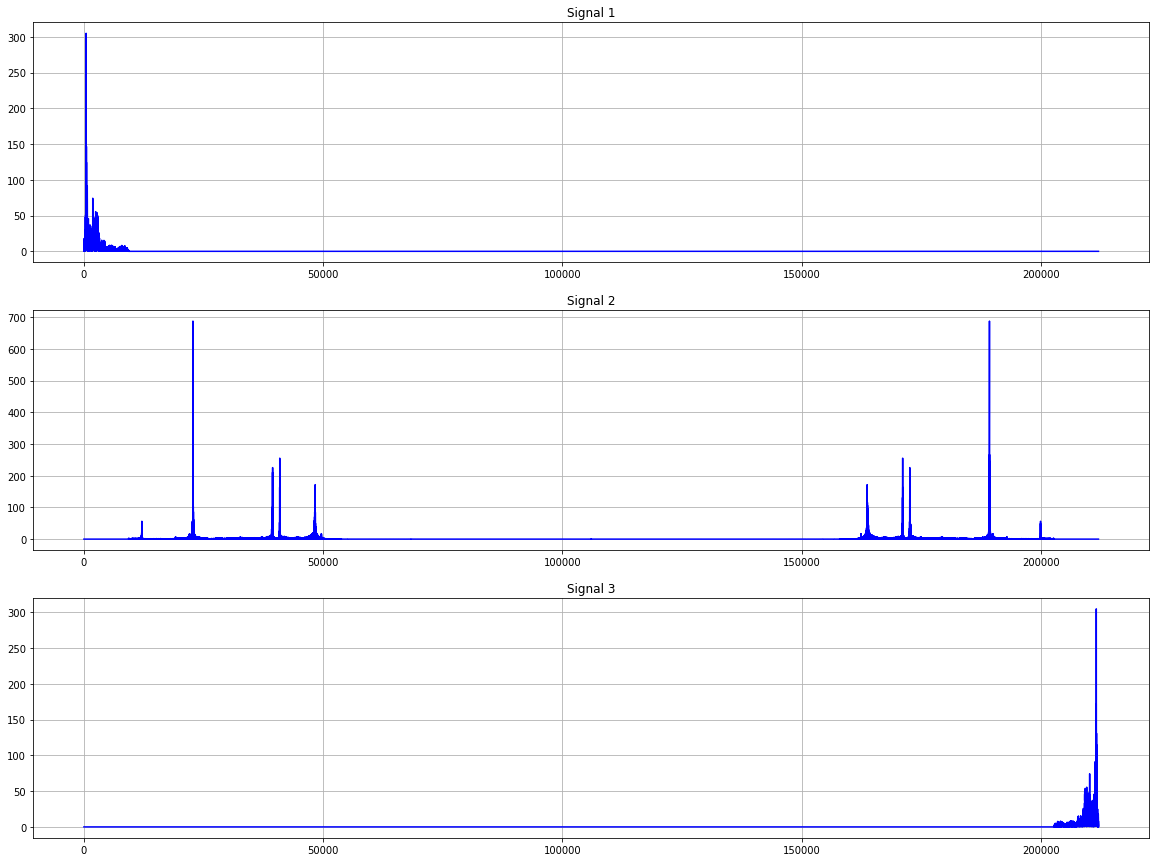

In [47]:
# Make cuts
split, cut = filter_sound(epsilon, const)
print("Number of extrapolated signals", len(split), "(potentially correct + noise)")

# Charts
fig = plt.figure(1, figsize=(20,5*len(split)))
for x in range(len(split)):
    ax = fig.add_subplot(len(split), 1, x+1)
    ax.set_title("Signal "+str(x+1))
    ax.plot(np.abs(split[x]), '-b')
    ax.grid()

##**Reconstruct the starting signals**

As you will easily notice from the graphs given by the cell above, the resulting division is by signals, not by instruments. This happens because, given two instruments and their Fourier, we obtain that each Fourier is mirrored. As can be seen in this example.

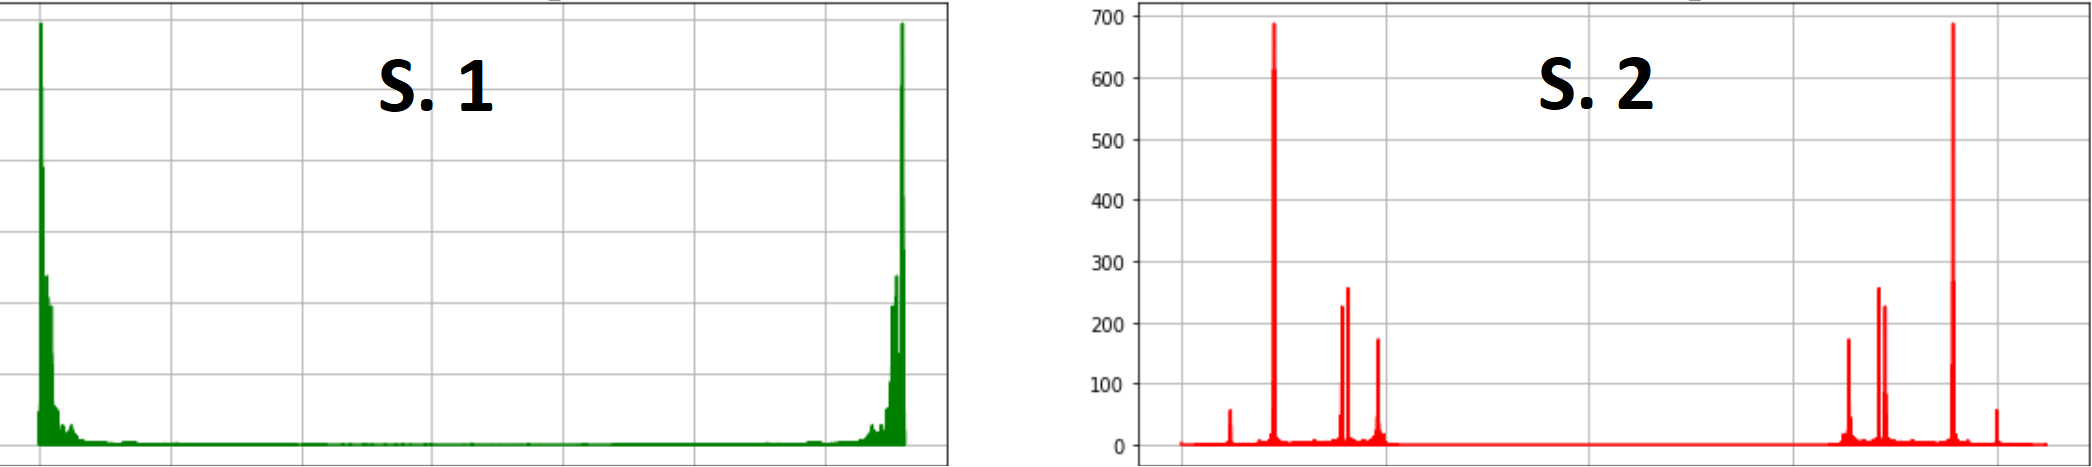

This means that if we insert another signal (red) in the graph of the green instrument with a Fourier with frequencies that are located approximately in the center of our graph, then the algorithm that makes the cuts will consider twice the green signal, shown above, while it will recognize the red signal only once, precisely because its Fourier has values ​​that are placed "in the middle" of that of the first signal and is never interrupted by frequencies of other signals.

This happens because the program that makes the cuts checks the signal from left to right, looking for the points where one instrument probably ends and another begins. Therefore, if first an instrument is recognized (first part of the green signal), then the second (red signal) will be found entirely and finally we will go back to recognizing the first (last part of the green signal), or rather its mirrored graph.

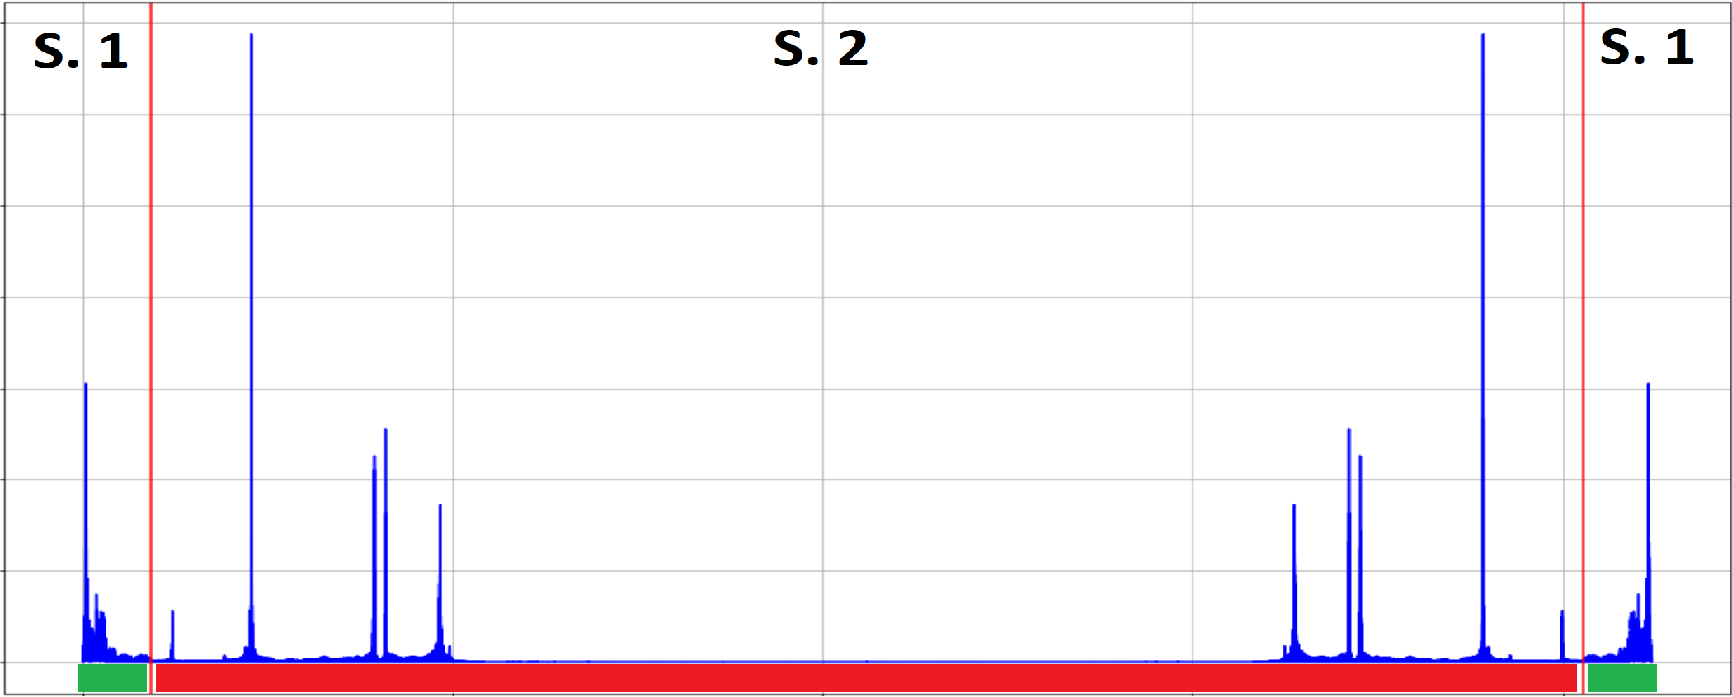

As you can guess from this example, 2 cuts were made recognizing 3 possible signals that should correspond to the 2 instruments. So all that remains is to combine the first and last signals to obtain the original Fourier of the first instrument. This is not necessary for the instrument with frequencies in the center of the graph as it is not interrupted by other instruments and therefore is recognized in full.

To rejoin the signals and recover the Fourier of the starting instrument, it will be sufficient to add the two signals corresponding to the same instrument.

This is done and the result is visible in the graphs below, with the possibility of listening to the original audio, once extrapolated.

Instrument 1


Instrument 2


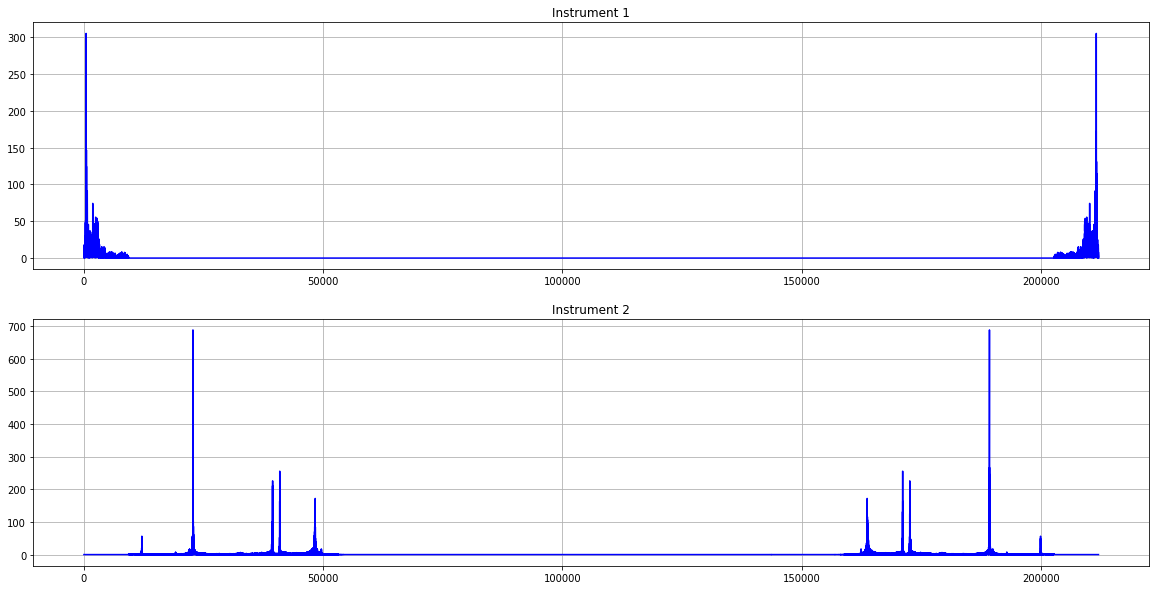

In [48]:
# Combine the signals to get the initial tools
final = []      # contains the instruments
if len(split) > 2:
    for x in range(int(len(split)/2)):
        final.append(np.add(split[x],split[-(x+1)]))    # Join the first and last signal obtained
    if len(split)%2 != 0:                               # instrument with median frequencies
        final.append(split[int(len(split)/2)])
else:
    final = split                                       # if get only one signal

# Final charts and audio
fig = plt.figure(1, figsize=(20,5*len(final)))
for x in range(len(final)):
    ax = fig.add_subplot(len(final), 1, x+1)
    ax.set_title("Instrument "+str(x+1))
    ax.plot(np.abs(final[x]), '-b')
    ax.grid()
    print("Instrument", x+1)
    IPython.display.display(IPython.display.Audio(np.fft.ifft(final[x]), rate=frequency_3))


**Visualization of the cuts on the Fourier of the composite signal**

Through the values ​​on the x axis saved during the cut I allow a simpler visualization of the cuts and therefore of the division into tools carried out by the algorithm

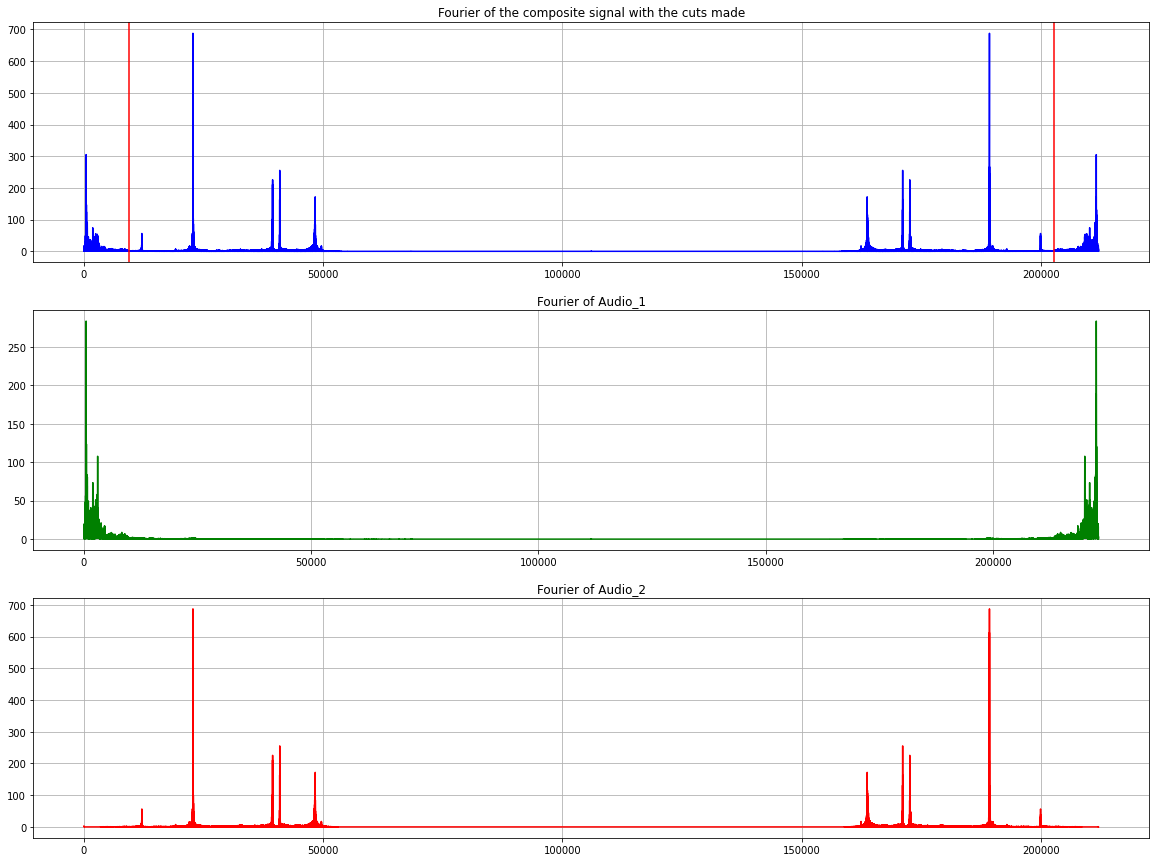

In [49]:
# The graphs show us where the "cuts" were made
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
ax[0].plot(np.abs(fourier), '-b')
ax[1].plot(np.abs(fourier_1), '-g')
ax[2].plot(np.abs(fourier_2), '-r')

for x in cut:   # vertical lines where the cuts were made
    ax[0].axvline(x, color='r')

ax[0].set_title("Fourier of the composite signal with the cuts made")
ax[1].set_title("Fourier of Audio_1")
ax[2].set_title("Fourier of Audio_2")
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

> As can be seen from the cut, some frequencies of both the green and red signals have been lost. More precisely, the green signal has recognized frequencies belonging to red as its own and vice versa. Unfortunately this is unavoidable due to the overlapping of frequencies and the noise that connects the two signals. Because of these inaccuracies, it is possible to recognize remnants of the sound emitted by others within the extrapolated instruments.
>
> An example would be the clanging noise of the double bass string vibration within the triangle audio.
>
> Or the rumble of the triangle sound on the walls of the recording room within the sound of the contrabass/bass.

**Audio track display and comparison**

This cell contains the code to display the graphs relating to the original audio tracks and those obtained from the execution of the algorithm.

In this way it is possible to visualize the errors due to the precision of the cut and the overlapping of frequencies within the Fourier transform of the composite signal, where observable.

The chart scales used could be different between original instruments and resulting instruments, this is not significant as this section wants to qualitatively evaluate the goodness of the execution. Furthermore, the duration of the signals could also be different, since to form the composite signal I used instruments with audio tracks of different lengths.

Display of the original audio tracks and their respective spectrograms


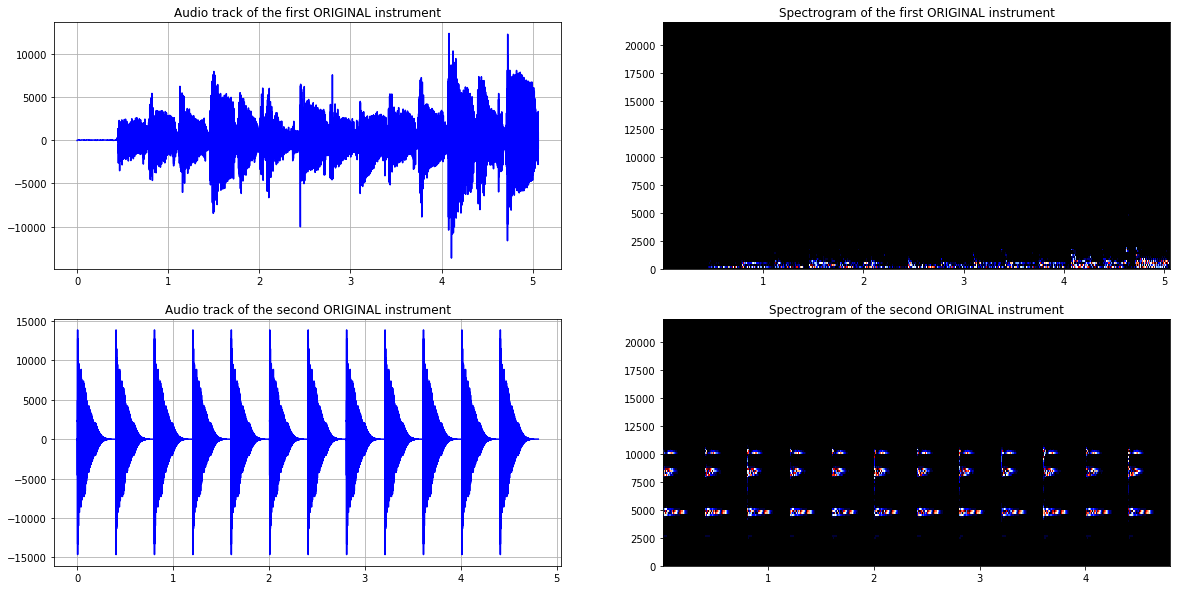


Display of the resulting audio tracks and their respective spectrograms


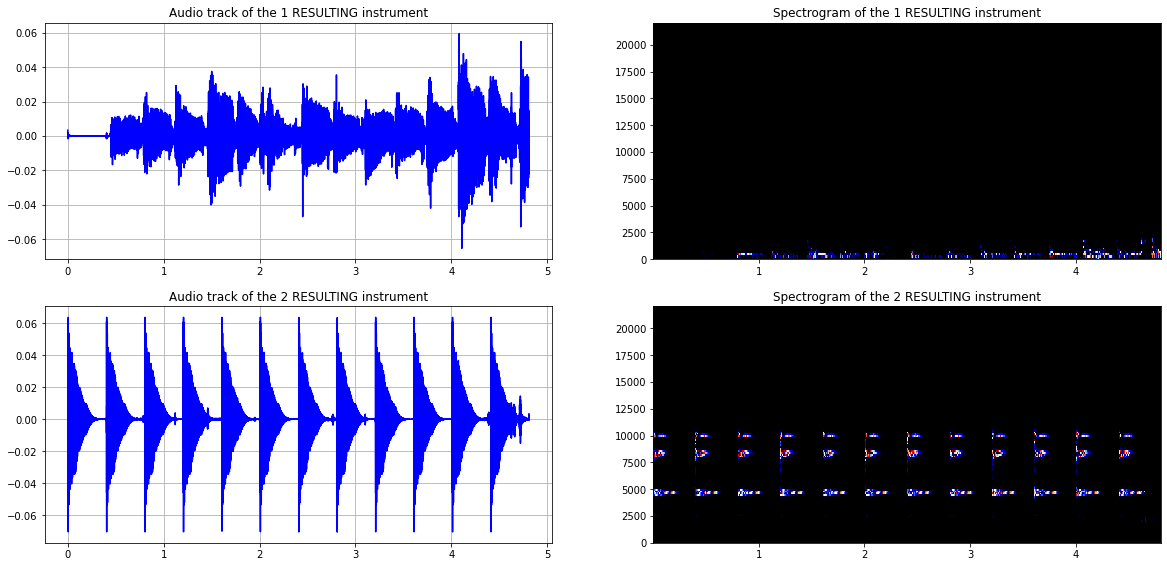

In [50]:
# Display of the original audio tracks and their respective spectrograms
print("Display of the original audio tracks and their respective spectrograms")
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0][0].set_title("Audio track of the first ORIGINAL instrument")
ax[0][0].plot(time_1, sound_1, '-b')
ax[0][0].grid()
freq, t, spectrogram = ss.spectrogram(sound_1, frequency_3)      # I use frequency_3 for each signal, so the scale used is the same
ax[0][1].set_title("Spectrogram of the first ORIGINAL instrument")
ax[0][1].pcolormesh(t, freq, spectrogram, cmap='flag_r')
ax[1][0].set_title("Audio track of the second ORIGINAL instrument")
ax[1][0].plot(time_2, sound_2, '-b')
ax[1][0].grid()
freq, t, spectrogram = ss.spectrogram(sound_2, frequency_3)      # I use frequency_3 for each signal, so the scale used is the same
ax[1][1].set_title("Spectrogram of the second ORIGINAL instrument")
ax[1][1].pcolormesh(t, freq, spectrogram, cmap='flag_r')
plt.show()

# Display of the resulting audio tracks and their respective spectrograms
print("\nDisplay of the resulting audio tracks and their respective spectrograms")
fig = plt.figure(1, figsize=(20,10*len(final)))
for x in range(len(final)):                                     # Print as many graphs as there are extrapolated instruments
    inv = np.fft.ifft(final[x])                                 # inverse of Fourier
    ax = fig.add_subplot(len(final)*2, 2, 2*x+1)
    ax.set_title("Audio track of the "+str(x+1)+" RESULTING instrument")
    ax.plot(time_3, inv, '-b')
    ax.grid()
    ax = fig.add_subplot(len(final)*2, 2, 2*x+2)
    freq, t, spectrogram = ss.spectrogram(inv, frequency_3)     # I use frequency_3 for each signal, so the scale used is the same
    ax.set_title("Spectrogram of the "+str(x+1)+" RESULTING instrument")
    ax.pcolormesh(t, np.abs(freq), spectrogram, cmap='flag_r')

> Given the graphs shown above, we can see that both in the audio track and in the spectrogram the results obtained are very similar to the original, obviously with small errors due to the overlapping of the frequencies and the precision of the cut. These errors are more visible in the trace of the second instrument, which basically has a very simple graph, while in the resulting graph we can see more values ​​appear.

# **Conclusions**

As expected, the algorithm is able to divide the composite signal into instruments and allows you to listen to them one at a time. A very attentive ear may still have recognized, within the audio of one instrument, the remnants of the other instrument (in some cases so small as not to be perceptible). This is due to the precision of the cut, which is not always optimal and does not allow a clear division of the two instruments, especially in cases where the frequency of the transform of the instruments overlaps.

Despite this, the result obtained is still very satisfactory, especially in the example cases.

**Sources:**
* I took information only from sporadic searches (wikipedia)